# Chapter 2 - End to End Machine Learning Project

**NOTES**

- When you are **spliting train/test**  consider the strata of your data; For classification it's more obvious using Stratified, but for regression it's also possible, and desirable to consider this step. You can create a new feature by binning the labels in categories that are large enough, and then doing the split.

- When **exploring visualisation**, create a copy of X_train not to mess the data. DO NOT USE X_test in your explorations.

In [ ]:
# to activate the virtual ML use in the terminal
# cd <path>
# souce env/bin/activate

## 1. Load the data + quick inspect

In [9]:
import pandas as pd
import numbers as np
%matplotlib inline
import matplotlib.pyplot as plt

# the function is created here as a good practice
# in an external environment you'd also need to use make of different directories, for example
def load_housing_data(housing_path="../data/housing.csv"):
    return pd.read_csv(housing_path)

# loads data
housing = load_housing_data()

# check data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
# quick inspect 
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
# we see that the "ocean_proximity" is an object
# let's check if its values are consistent

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
# describe shows a summary of the numerical attributes
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


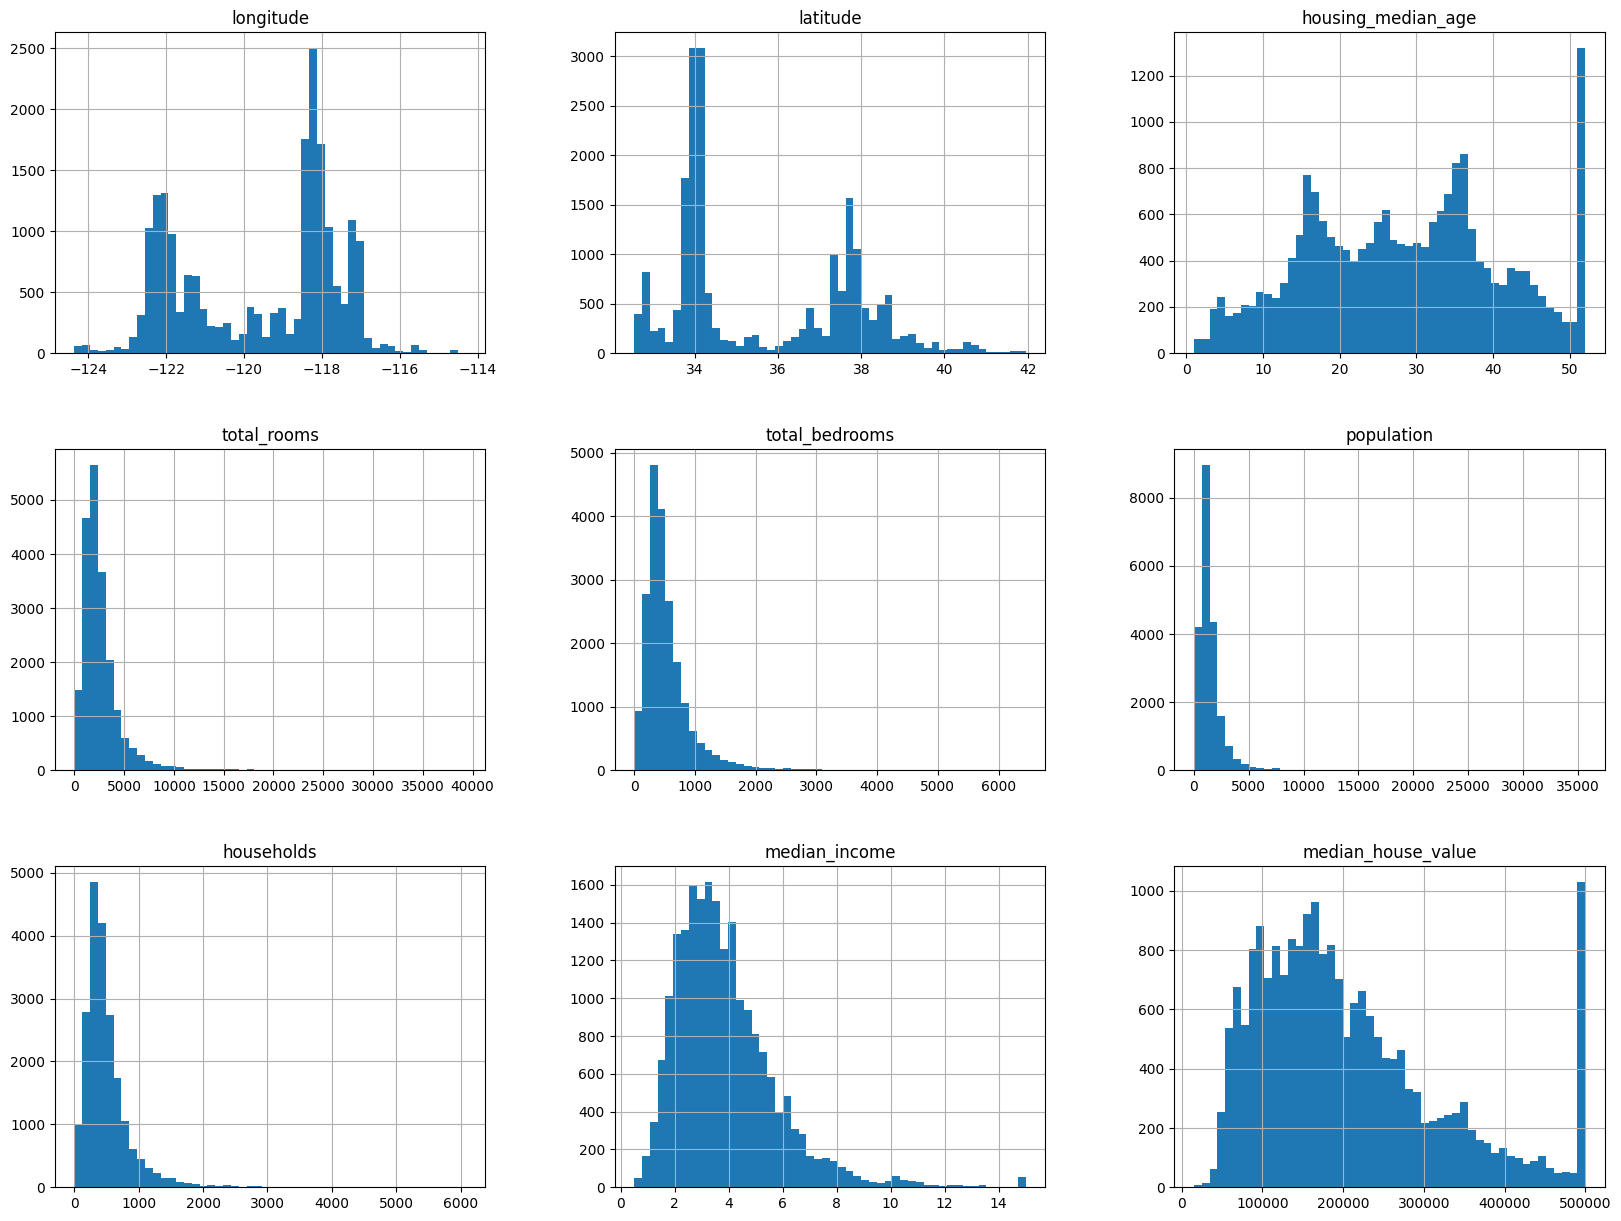

In [13]:
# the function hist() plots a histogram for all the numeric attributes
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## 2. Train and Test split

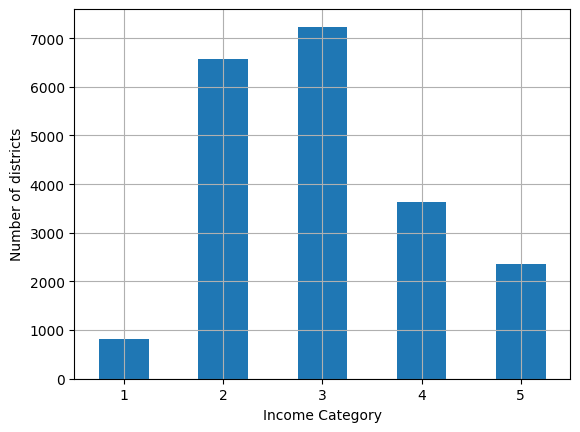

In [21]:
import math

# create a new category based on the label to ensure split will be proportional
housing["income_cat"] = pd.cut(housing["median_income"], 
                                bins=[0, 1.5, 3, 4.5, 6, math.inf],
                                labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

This looks like a normal distribution, which is fine. 
Now we will move into creating the X_test / X_train using the strata, to make sure we will have the same distribution in both groups.

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=25)

## 3. Exploring the data with visualisation

In [25]:
# create a copy of X_train to play with visualisations without messing the data
housing_vis = X_train.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

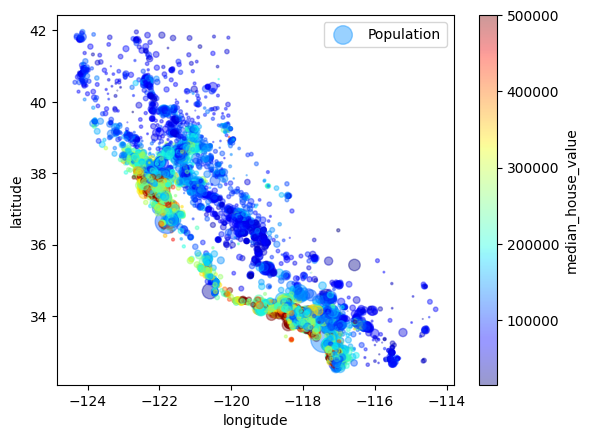

In [33]:
# Here we will plot a graph with the geographical data
# to explore where the prices are more/less expensive

housing_vis.plot(kind="scatter",  x="longitude", y= "latitude",
alpha=0.4, # alpha controls the sensity, brigher points,
s= housing_vis["population"]/100, label="Population", # s is the size of the point. Here we use scale it to show density 
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) # the jet uses the predefined palette 